# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# 宣告採用序列模型
model = Sequential()

# 建構輸入層
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

# 建構中間層_第1層
model.add(Dense(units=40,
               kernel_initializer='normal',
               activation='relu'))

# 建構輸出層
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 40)                10280     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                410       
Total params: 211,650
Trainable params: 211,650
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', metrics=['accuracy']) # metrics=['accuracy']代表模型評估標準採用accuracy

In [10]:
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=32,
                         verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 185us/step - loss: 0.3044 - accuracy: 0.9121 - val_loss: 0.1345 - val_accuracy: 0.9597
Epoch 2/10
48000/48000 [==============================] - 8s 169us/step - loss: 0.1137 - accuracy: 0.9651 - val_loss: 0.1153 - val_accuracy: 0.9652
Epoch 3/10
48000/48000 [==============================] - 10s 216us/step - loss: 0.0754 - accuracy: 0.9771 - val_loss: 0.0925 - val_accuracy: 0.9714
Epoch 4/10
48000/48000 [==============================] - 12s 246us/step - loss: 0.0562 - accuracy: 0.9823 - val_loss: 0.0862 - val_accuracy: 0.9747
Epoch 5/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0864 - val_accuracy: 0.9748
Epoch 6/10
48000/48000 [==============================] - 8s 167us/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0947 - val_accuracy: 0.9747
Epoch 7/10
48000/48000 [==============================] - 8s

# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

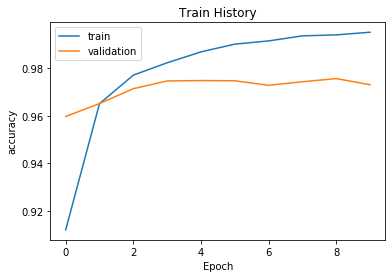

In [12]:
show_train_history(train_history,'accuracy','val_accuracy')

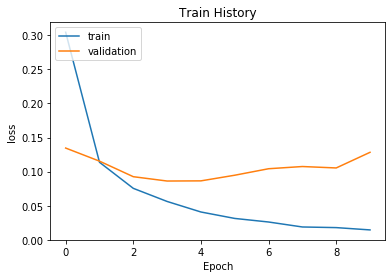

In [13]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [14]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 49us/step

accuracy= 0.9732999801635742
